In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("height.csv")
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [4]:
df["height"].quantile(.95)

9.689999999999998

In [5]:
max_threshold = df["height"].quantile(.95)

In [6]:
min_threshold = df ["height"].quantile(.05)
min_threshold

3.6050000000000004

In [10]:
df_new = df[(df["height"]>min_threshold ) & (df["height"]<max_threshold )]   #Remove outliers
df_new

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [11]:
df = pd.read_csv("bph.csv")

In [12]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [17]:
df.shape

(13200, 7)

In [13]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [19]:
min_t, max_t= df.price_per_sqft.quantile([.001,.999])
min_t, max_t

(1366.184, 50959.36200000098)

In [20]:
df_new = df[(df["price_per_sqft"]<max_t) & (df["price_per_sqft"]>min_t)]

In [21]:
df_new.shape

(13172, 7)

In [ ]:
# z outlier score

In [22]:
df =pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'frequency')

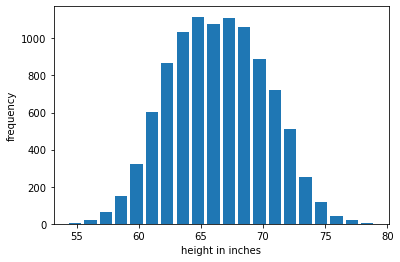

In [27]:
plt.hist(df["Height"],bins =20, rwidth = .8)
plt.xlabel("height in inches")
plt.ylabel("frequency")

In [ ]:
# Read this awesome article to get your fundamentals clear on normal distribution, bell curve and 
# standard deviation. https://www.mathsisfun.com/data/standard-normal-distribution.html


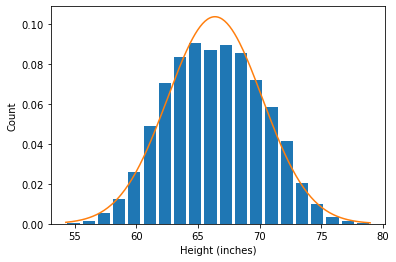

In [32]:
from scipy.stats import norm
import numpy as np
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [33]:
df.Height.mean()

66.36755975482106

In [34]:
df.Height.std()

3.8475281207732324

In [ ]:
# z = ((original - mean ) / standard deviation)  = multiple for standard deviation

In [ ]:
# Here the mean is 66.37 and standard deviation is 3.84.

# (1) Outlier detection and removal using 3 standard deviation
# One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean.
# Which means we can come up with following upper and lower bounds


In [37]:
upper  = df.Height.mean() + 3*(df.Height.std())

In [38]:
lower = df.Height.mean() - 3*(df.Height.std())

In [39]:
upper,lower

(77.91014411714076, 54.82497539250136)

In [40]:
df[(df["Height"]<lower ) | (df["Height"]>upper)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [42]:
len(df[(df["Height"]<lower ) | (df["Height"]>upper)])

7

In [44]:
df_new = df[(df["Height"]>lower ) & (df["Height"]<upper)]
df_new.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [47]:
df_new.shape[0] - df.shape[0]

-7

In [ ]:
# Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. 
# There are people who have this height but it is very uncommon and it is ok if you remove those data points.
# Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you 
# don't find many people having this height so it is safe to consider both of these cases as outliers


In [ ]:
# (2) Outlier detection and removal using Z Score


In [ ]:
# Z score is a way to achieve same thing that we did above in part (1)
# Z score indicates how many standard deviation away a data point is.
# For example in our case mean is 66.37 and standard deviation is 3.84.
# If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away
# (77.91 = 66.37 + 3 * 3.84)


In [53]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(2)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505


In [54]:
df[df['zscore']>3]


,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [55]:
df[df['zscore']<-3]


,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [56]:
df[(df.zscore<-3) | (df.zscore>3)]


,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [57]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [58]:
df_no_outliers.shape


(9993, 4)

In [59]:
df.shape

(10000, 4)

In [ ]:
Exercise
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result


In [ ]:
quantile + z_score + iqr

In [87]:
df = pd.read_csv("bph.csv")
df.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305


In [88]:
lower, upper = df["price_per_sqft"].quantile([.001,.999])
lower,upper

(1366.184, 50959.36200000098)

In [98]:
df[(df["price_per_sqft"]>upper) | (df["price_per_sqft"]<lower)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [93]:
df_new = df[(df["price_per_sqft"]<upper) & (df["price_per_sqft"]>lower)]

In [94]:
df_new.shape

(13172, 7)

In [95]:
df.shape

(13200, 7)

In [96]:
df_new.shape[0] - df.shape[0]    # 3207 row are eliminated

-28

In [99]:
upper = df_new["price_per_sqft"].mean() + 4*(df_new["price_per_sqft"].std())

In [100]:
lower =df_new["price_per_sqft"].mean() - 4*(df_new["price_per_sqft"].std())

In [105]:
lower,upper

(-9900.429065502549, 23227.73653589429)

In [111]:
eliminator = df_new[(df["price_per_sqft"]>upper) | (df["price_per_sqft"]<lower)]

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_26796/4176611190.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eliminator = df_new[(df["price_per_sqft"]>upper) | (df["price_per_sqft"]<lower)]


In [112]:
eliminator.shape

(125, 7)

In [113]:
df_after_standard = df_new[~(df["price_per_sqft"]>upper) | (df["price_per_sqft"]<lower)]

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_26796/3334485864.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_after_standard = df_new[~(df["price_per_sqft"]>upper) | (df["price_per_sqft"]<lower)]


In [127]:
len(df_after_standard)

13047

In [115]:
len(df_new) - len(df_after_standard)

125

In [123]:
df_new["z_score"] = ((df_new["price_per_sqft"] - df_new["price_per_sqft"].mean())/
                               df_new["price_per_sqft"].std())

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_26796/1880552502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["z_score"] = ((df_new["price_per_sqft"] - df_new["price_per_sqft"].mean())/


In [124]:
df_new

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [125]:
df_z = df_new[(df_new["z_score"]<4) & (df_new["z_score"]>-4)]

In [126]:
df_z.shape

(13047, 8)

In [130]:
Q3 = df_new["price_per_sqft"].quantile(.75)
Q1 = df_new["price_per_sqft"].quantile(.25)   # and q2 is  50 % quantile

In [135]:
df_new["price_per_sqft"].max()

50349

In [134]:
Q3,Q1

(7311.0, 4271.0)

In [131]:
IQR = Q3 - Q1  #or IQR = Q3 - Q1 , Q3 = 75% quantile and 
IQR                                                                                        # Q1 is 25% quantile

3040.0

In [132]:
upper = Q3 + 1.5*(IQR) 
lower = Q1 - 1.5*(IQR)

In [133]:
upper , lower

(11871.0, -289.0)

In [137]:
df = pd.read_csv("height.csv")
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [141]:
Q1 ,Q3 = df["height"].quantile([.25,.75])
Q1,Q3

(5.25, 6.175)

In [139]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [143]:
lower = Q1 - 1.5*(IQR)
lower

3.8625000000000003

In [144]:
upper = Q3 + 1.5*(IQR)
upper

7.5625

In [147]:
df_new_rejected = df[(df["height"]>upper) | (df["height"]<lower)]
df_new_rejected

,name,height
9,imran,14.5
12,yoseph,1.2


In [146]:
df_new_selected = df[~(df["height"]>upper) | (df["height"]<lower)]
df_new_selected

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1
